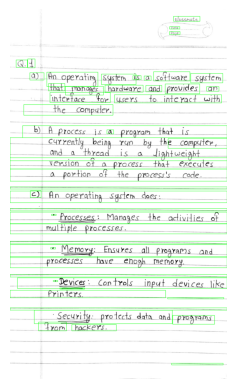

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "./output_images/page_1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding to binarize the image
_, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Dilate to connect characters into words
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))  # Adjust (15, 5) to control word segmentation sensitivity
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Find contours of the words
contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
segmented_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    # Filter small contours to remove noise
    if w > 10 and h > 10:
        cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save or display the segmented image
cv2.imwrite("segmented_words.png", segmented_image)
# Display inline using Matplotlib
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
